In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.shape

(8124, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# EDA



In [8]:
df['class'].unique()

array(['p', 'e'], dtype=object)

class p represent poisonous mushroom and class e represent ediable species.

In [9]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

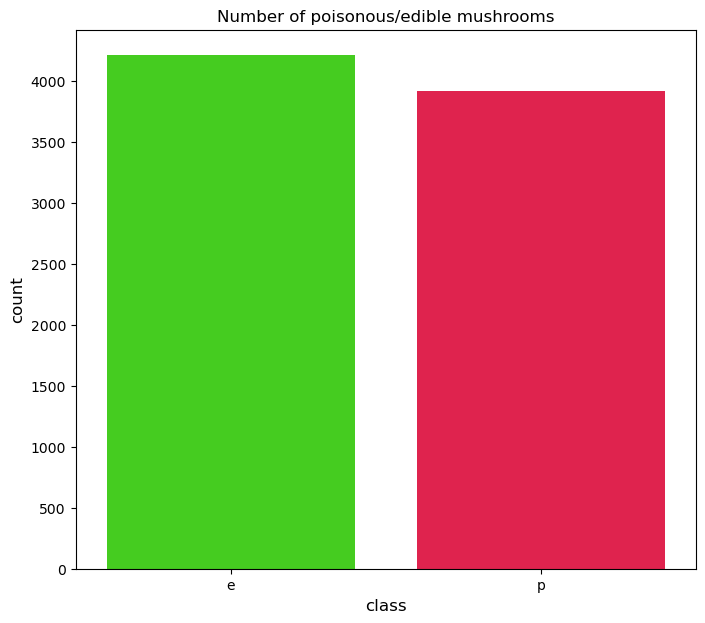

In [10]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index,y=count.values,alpha=0.99,palette='prism')
plt.ylabel('count',fontsize=12)
plt.xlabel('class',fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

In [11]:
def feature_class_plot(hue,features):
    for i, col in enumerate(features.columns):
        plt.figure(i)
        plt.figure(figsize=(10,8))
        ax = sns.countplot(x=df[col],hue=hue,data=df)

C:\Users\abhin\AppData\Local\Temp\ipykernel_10652\839101836.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = df.drop('class',1)
C:\Users\abhin\AppData\Local\Temp\ipykernel_10652\2194910360.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,8))


<Figure size 640x480 with 0 Axes>

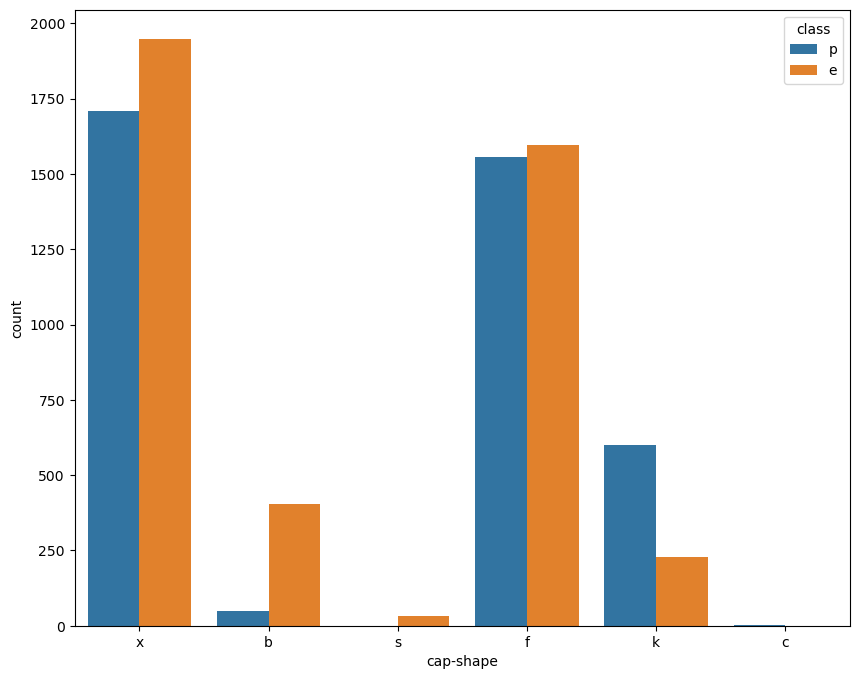

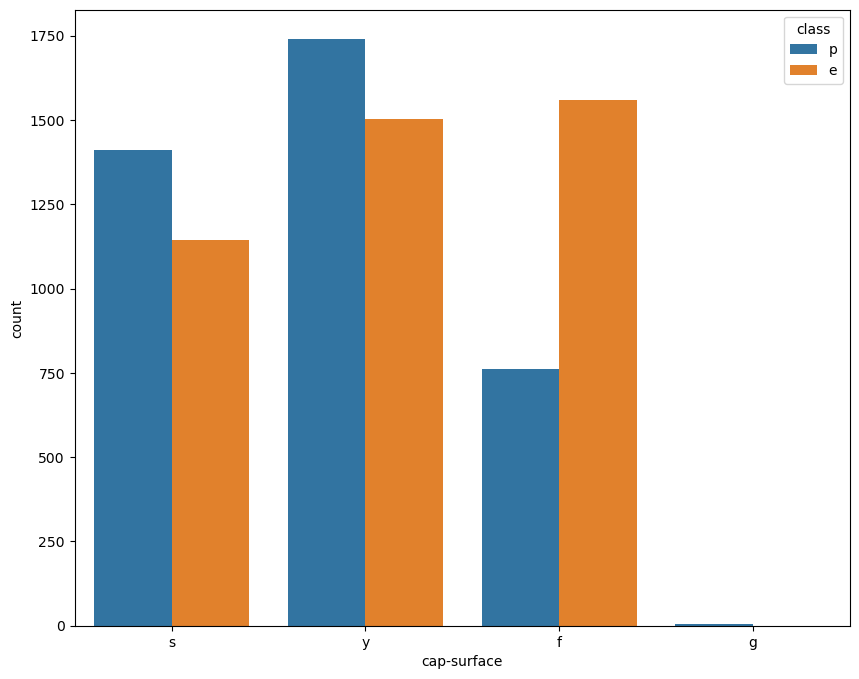

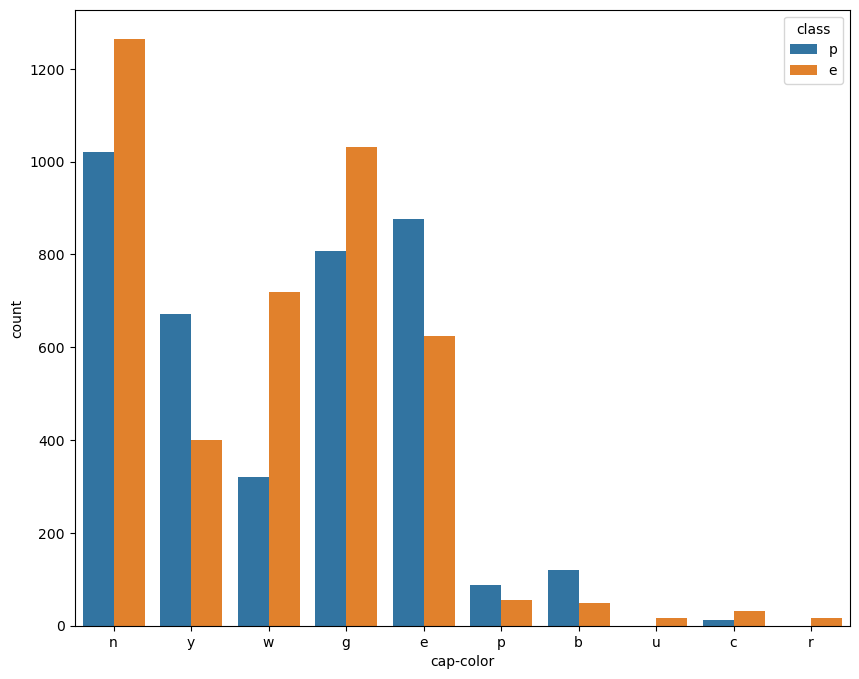

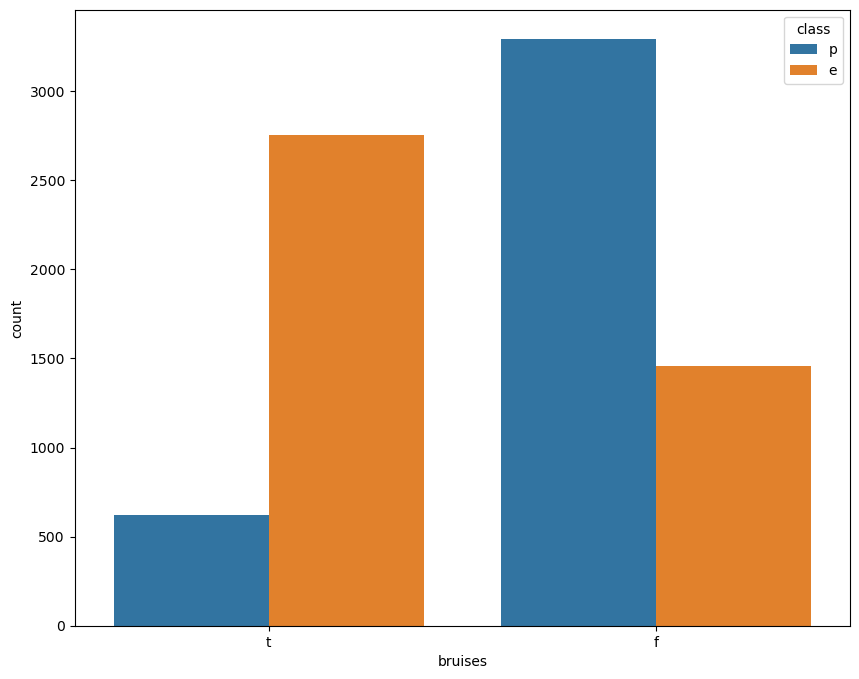

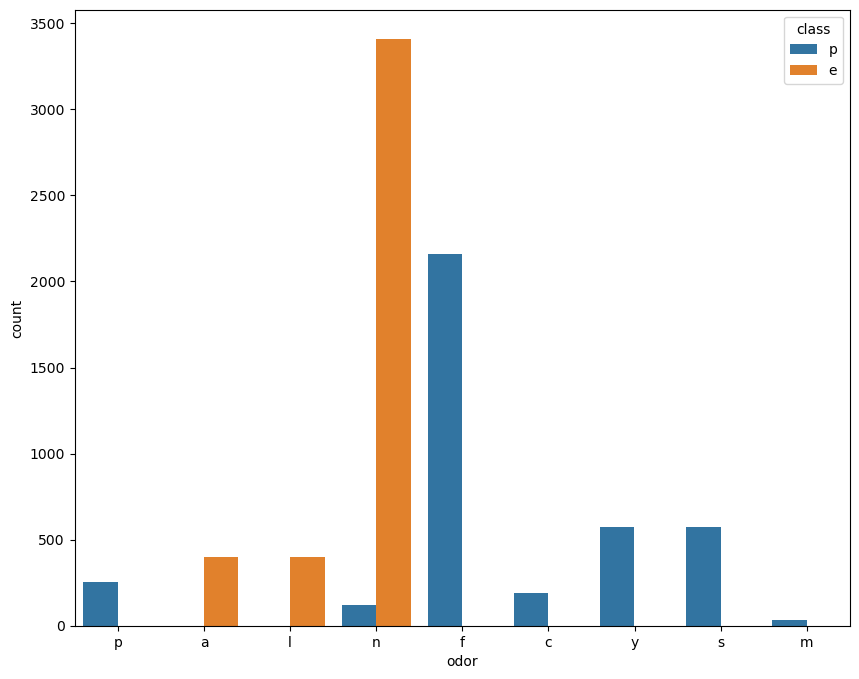

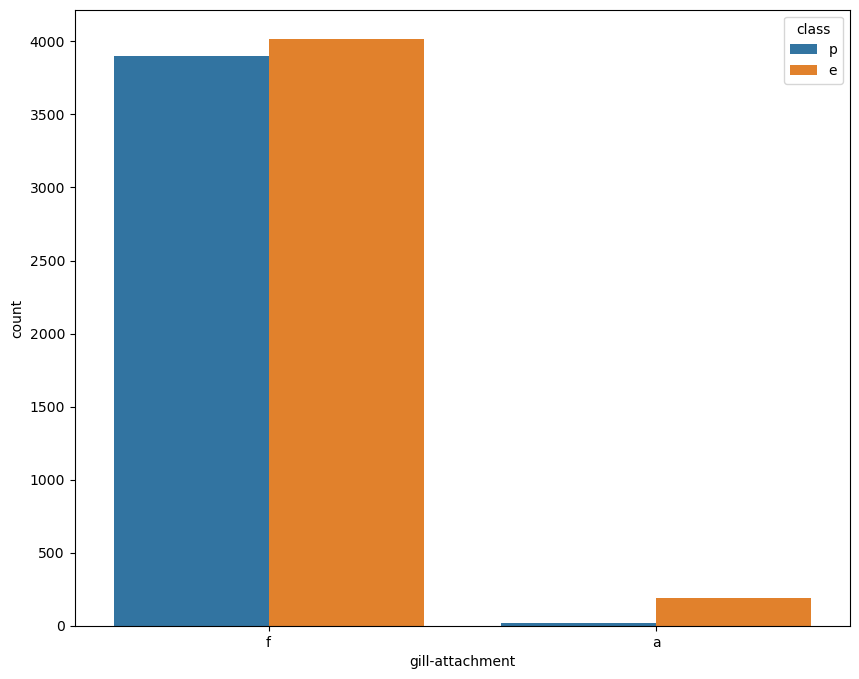

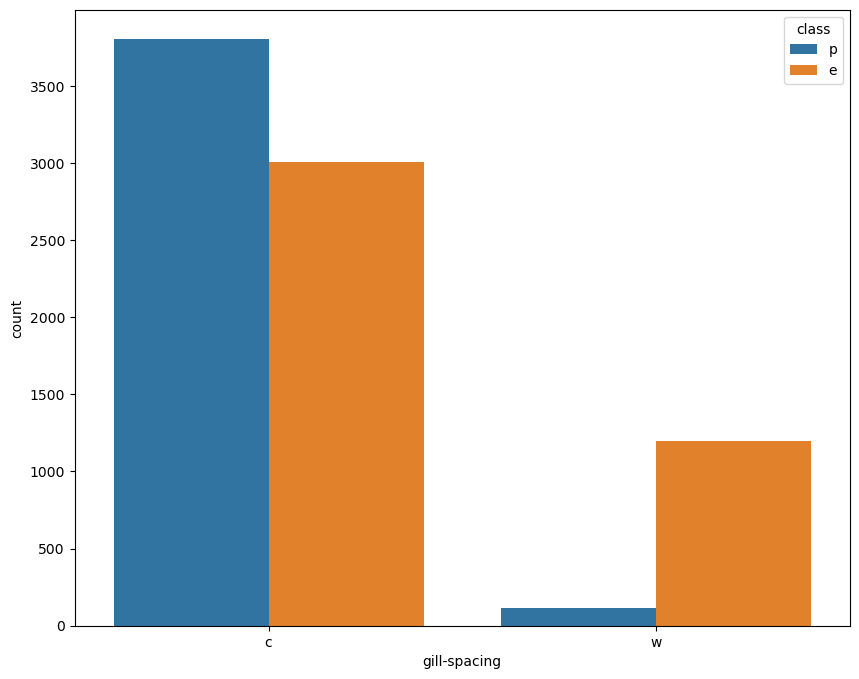

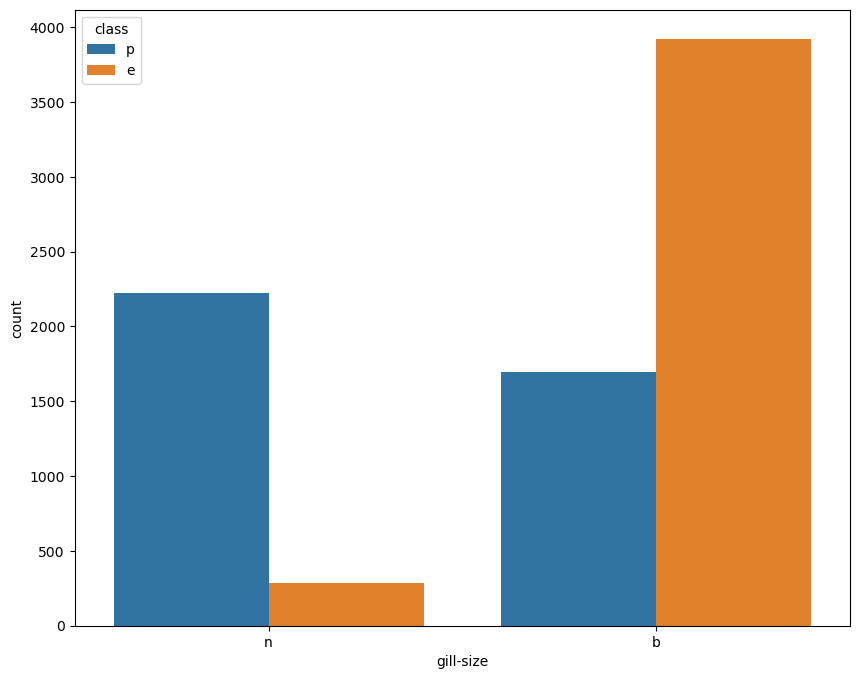

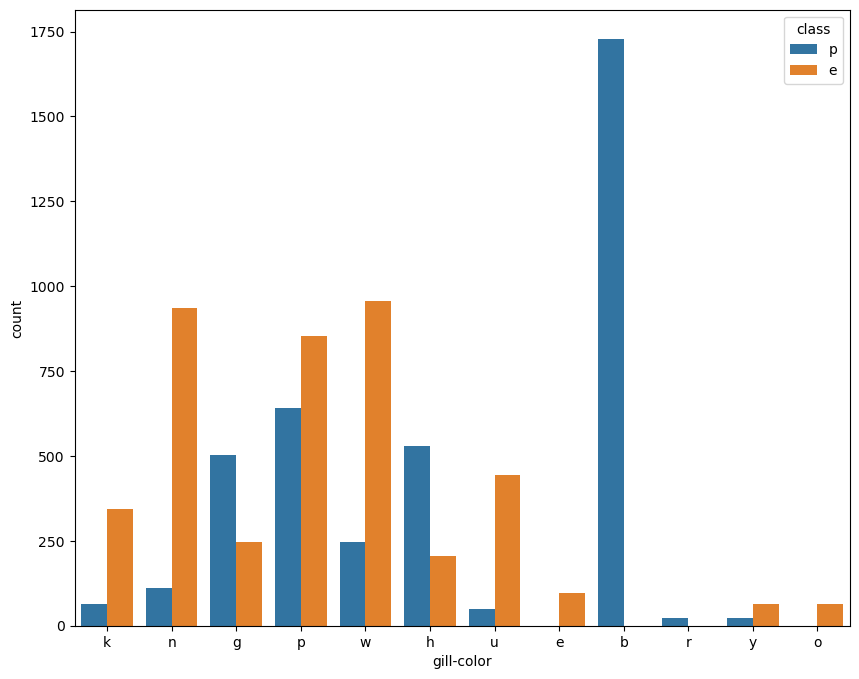

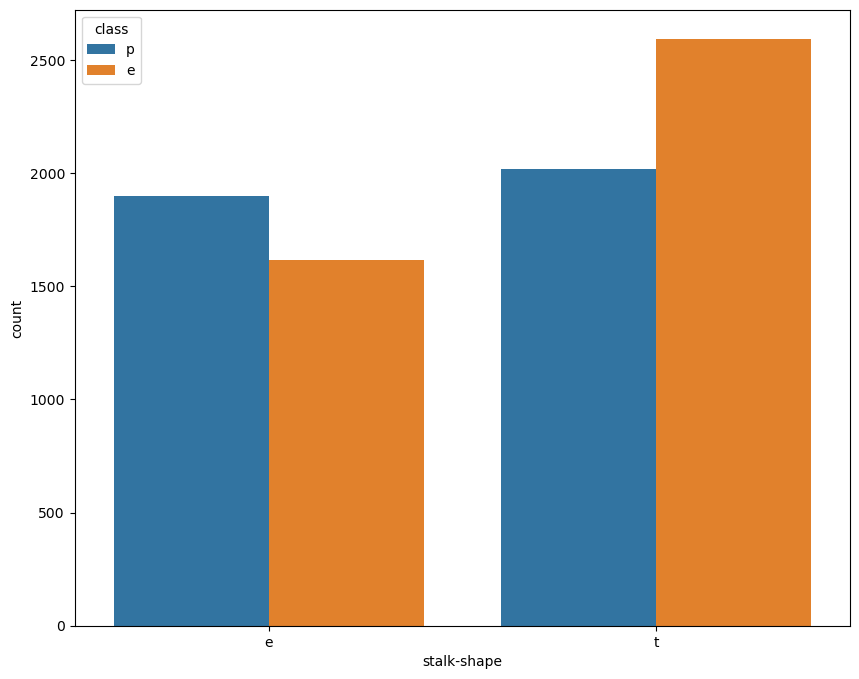

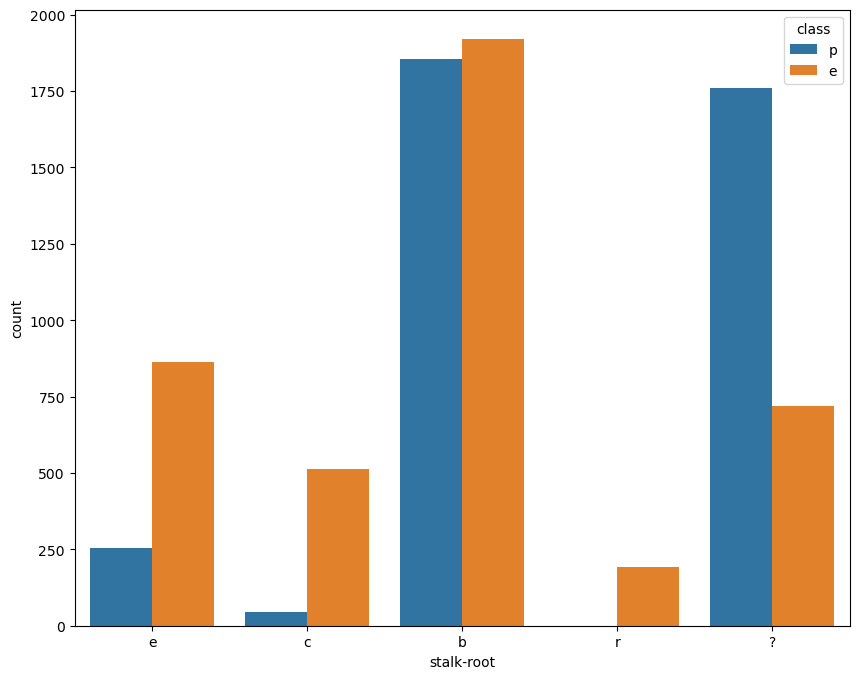

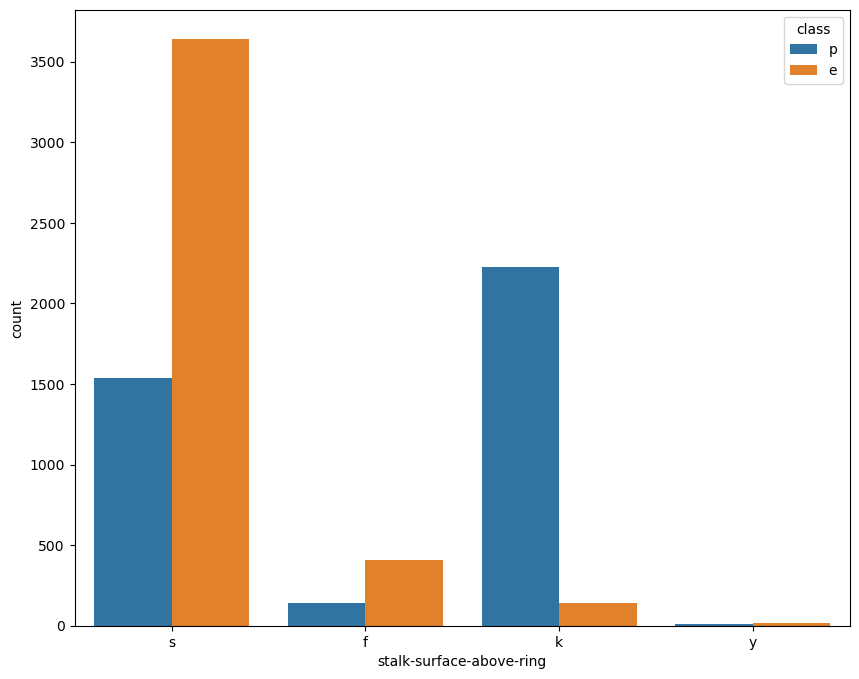

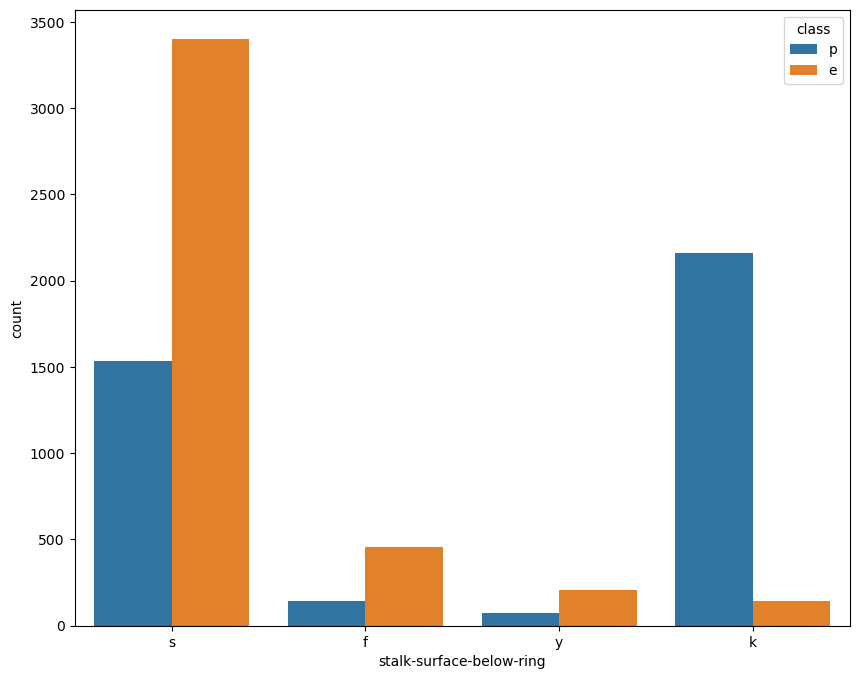

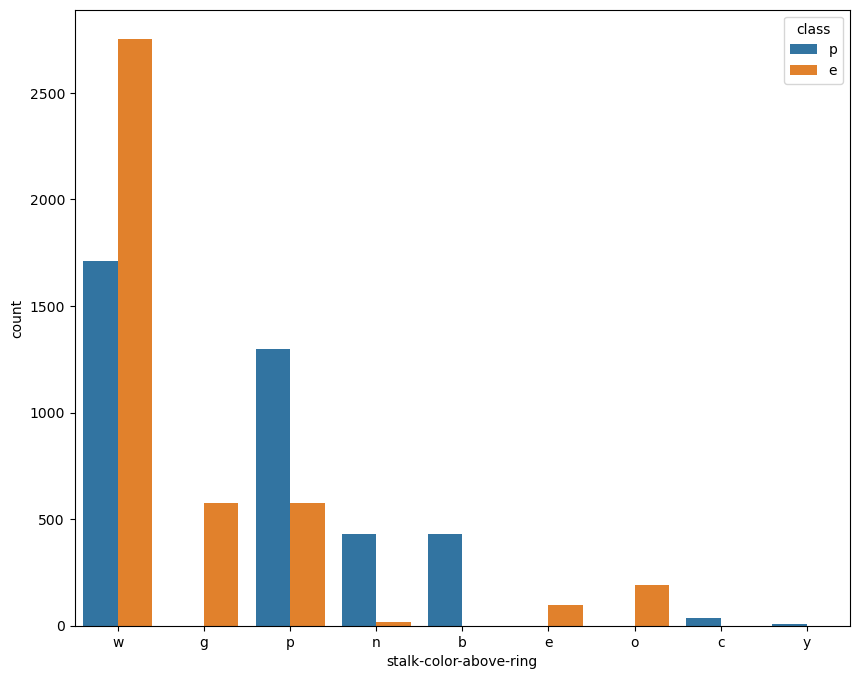

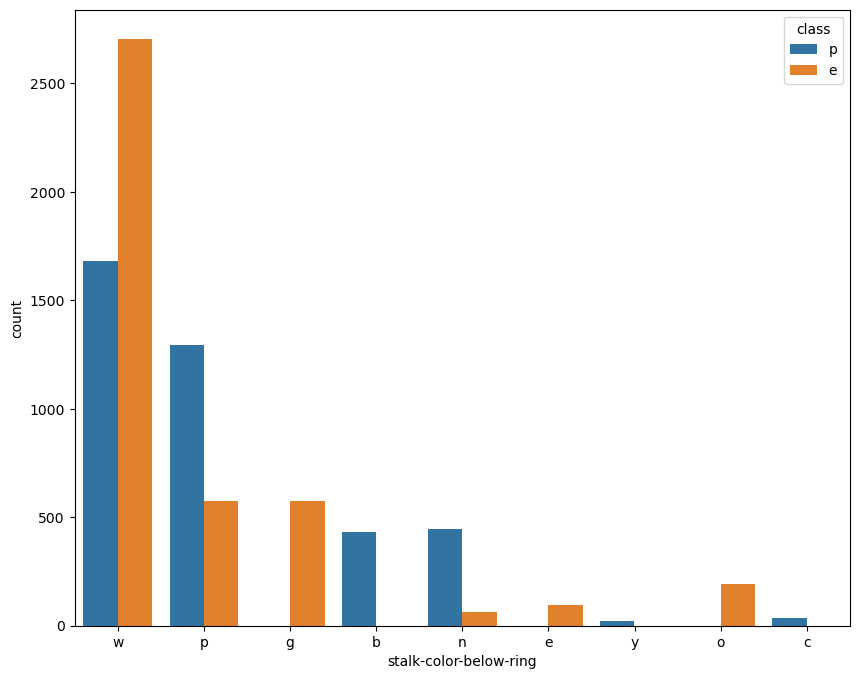

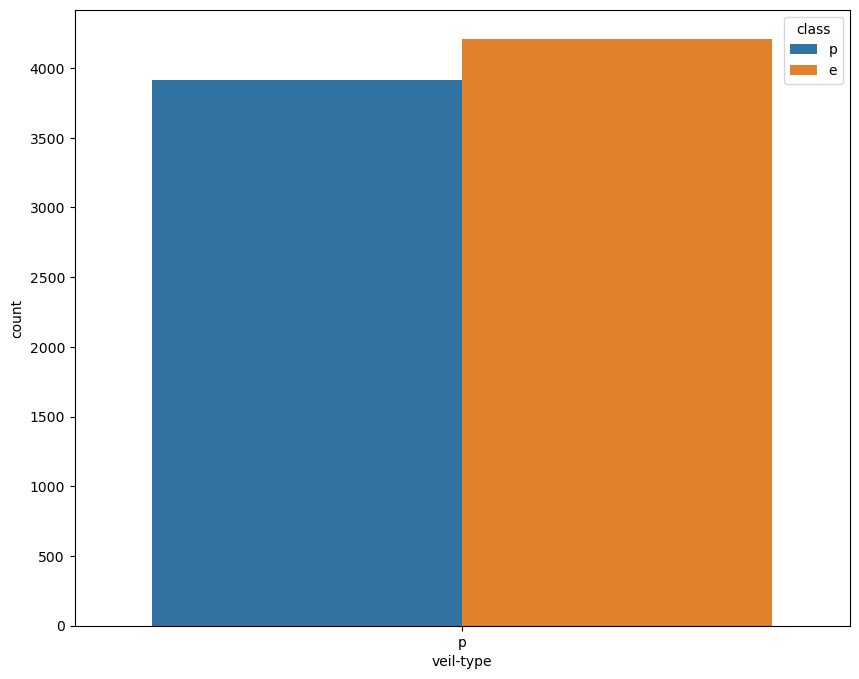

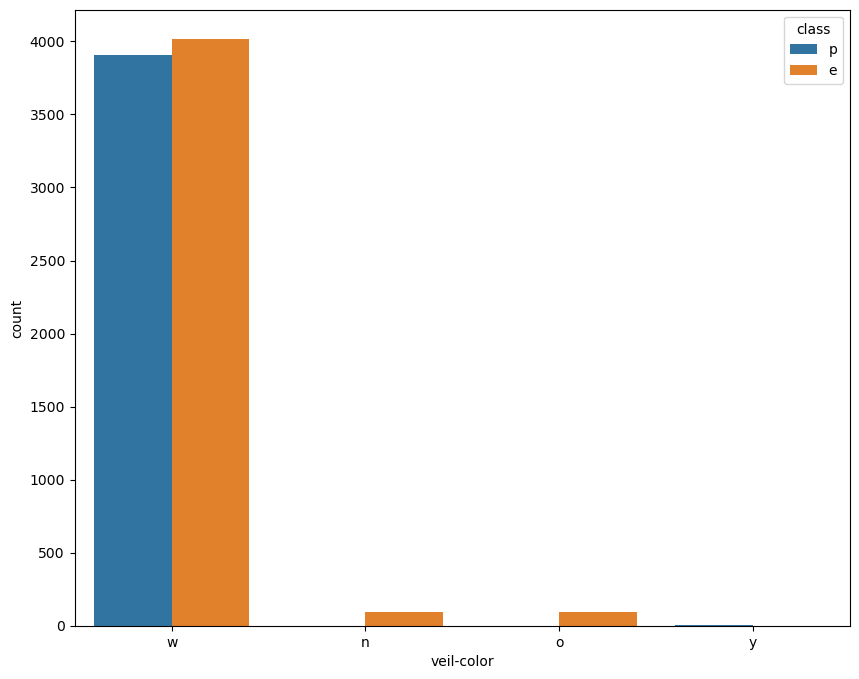

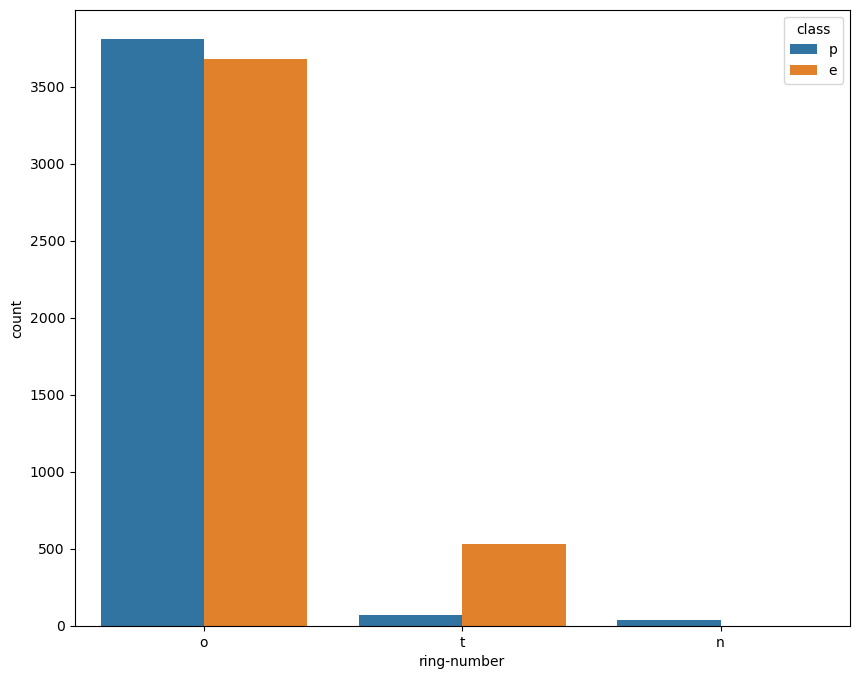

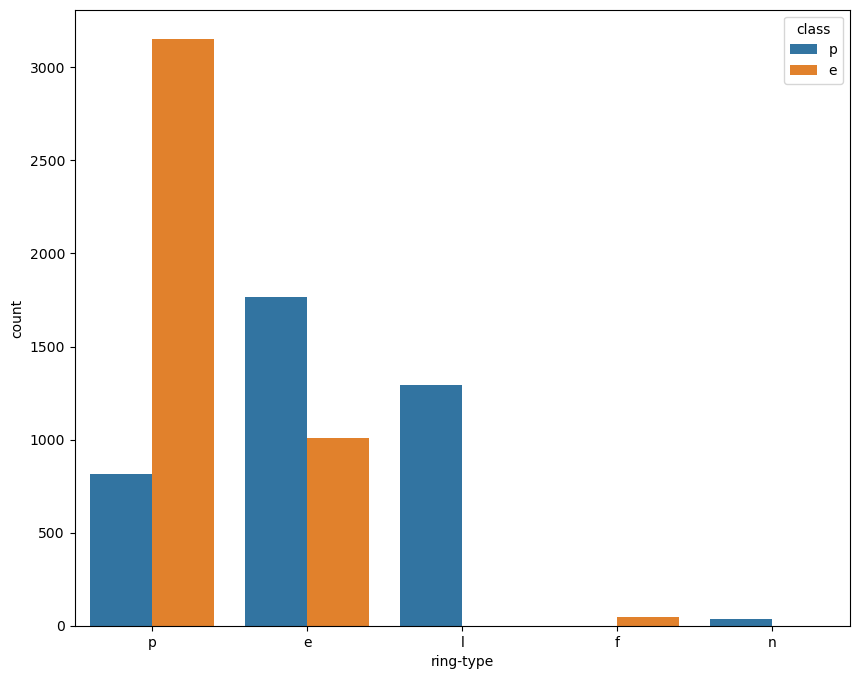

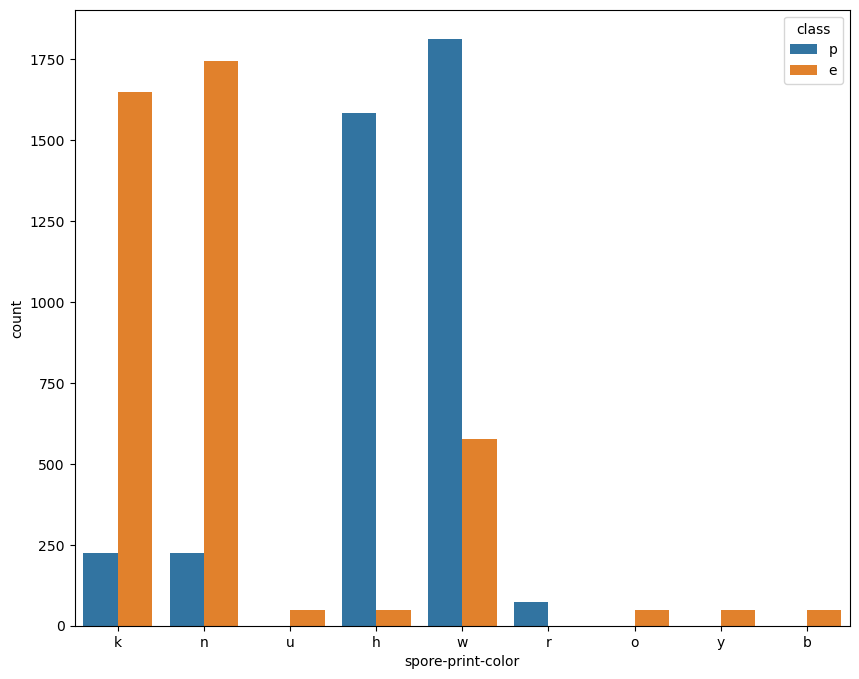

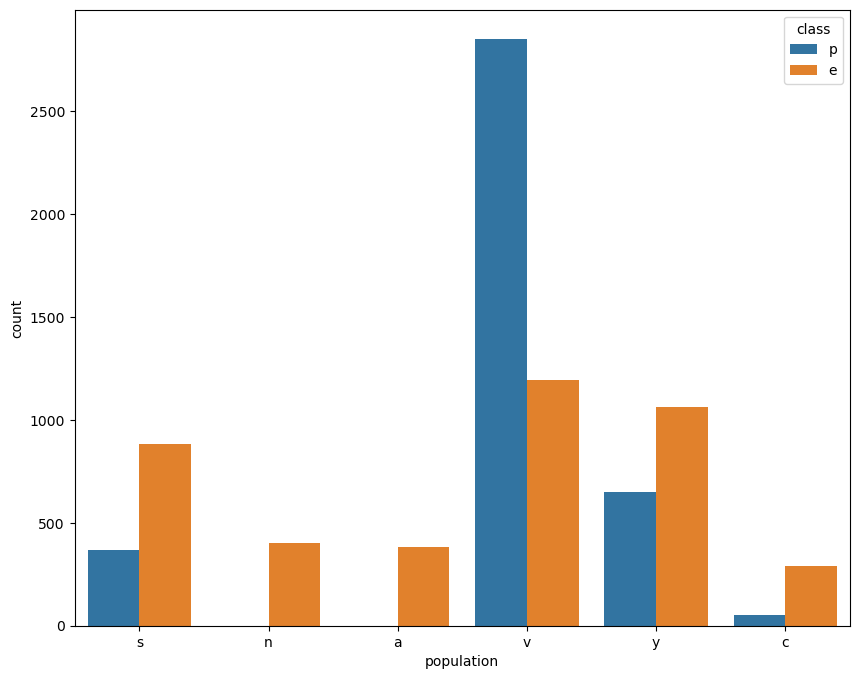

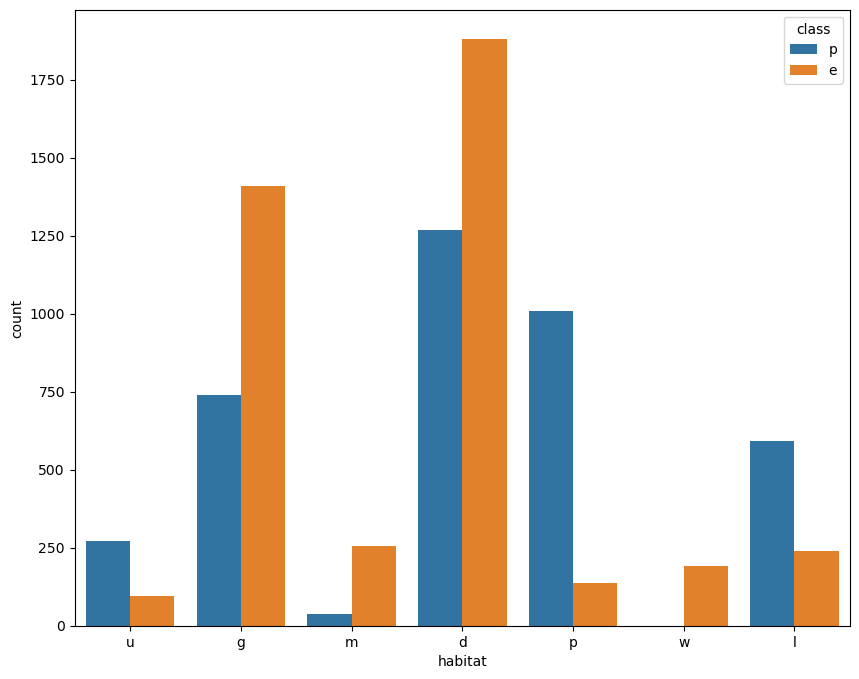

In [12]:
hue =df['class']
features = df.drop('class',1)
feature_class_plot(hue,features)

# coverting categorical data using label encoder

In [13]:
df = df.astype('category')

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [15]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [16]:
df['veil-type'].unique()

array([0])

In [17]:
df = df.drop(['veil-type'],axis=1)

In [18]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<Axes: >

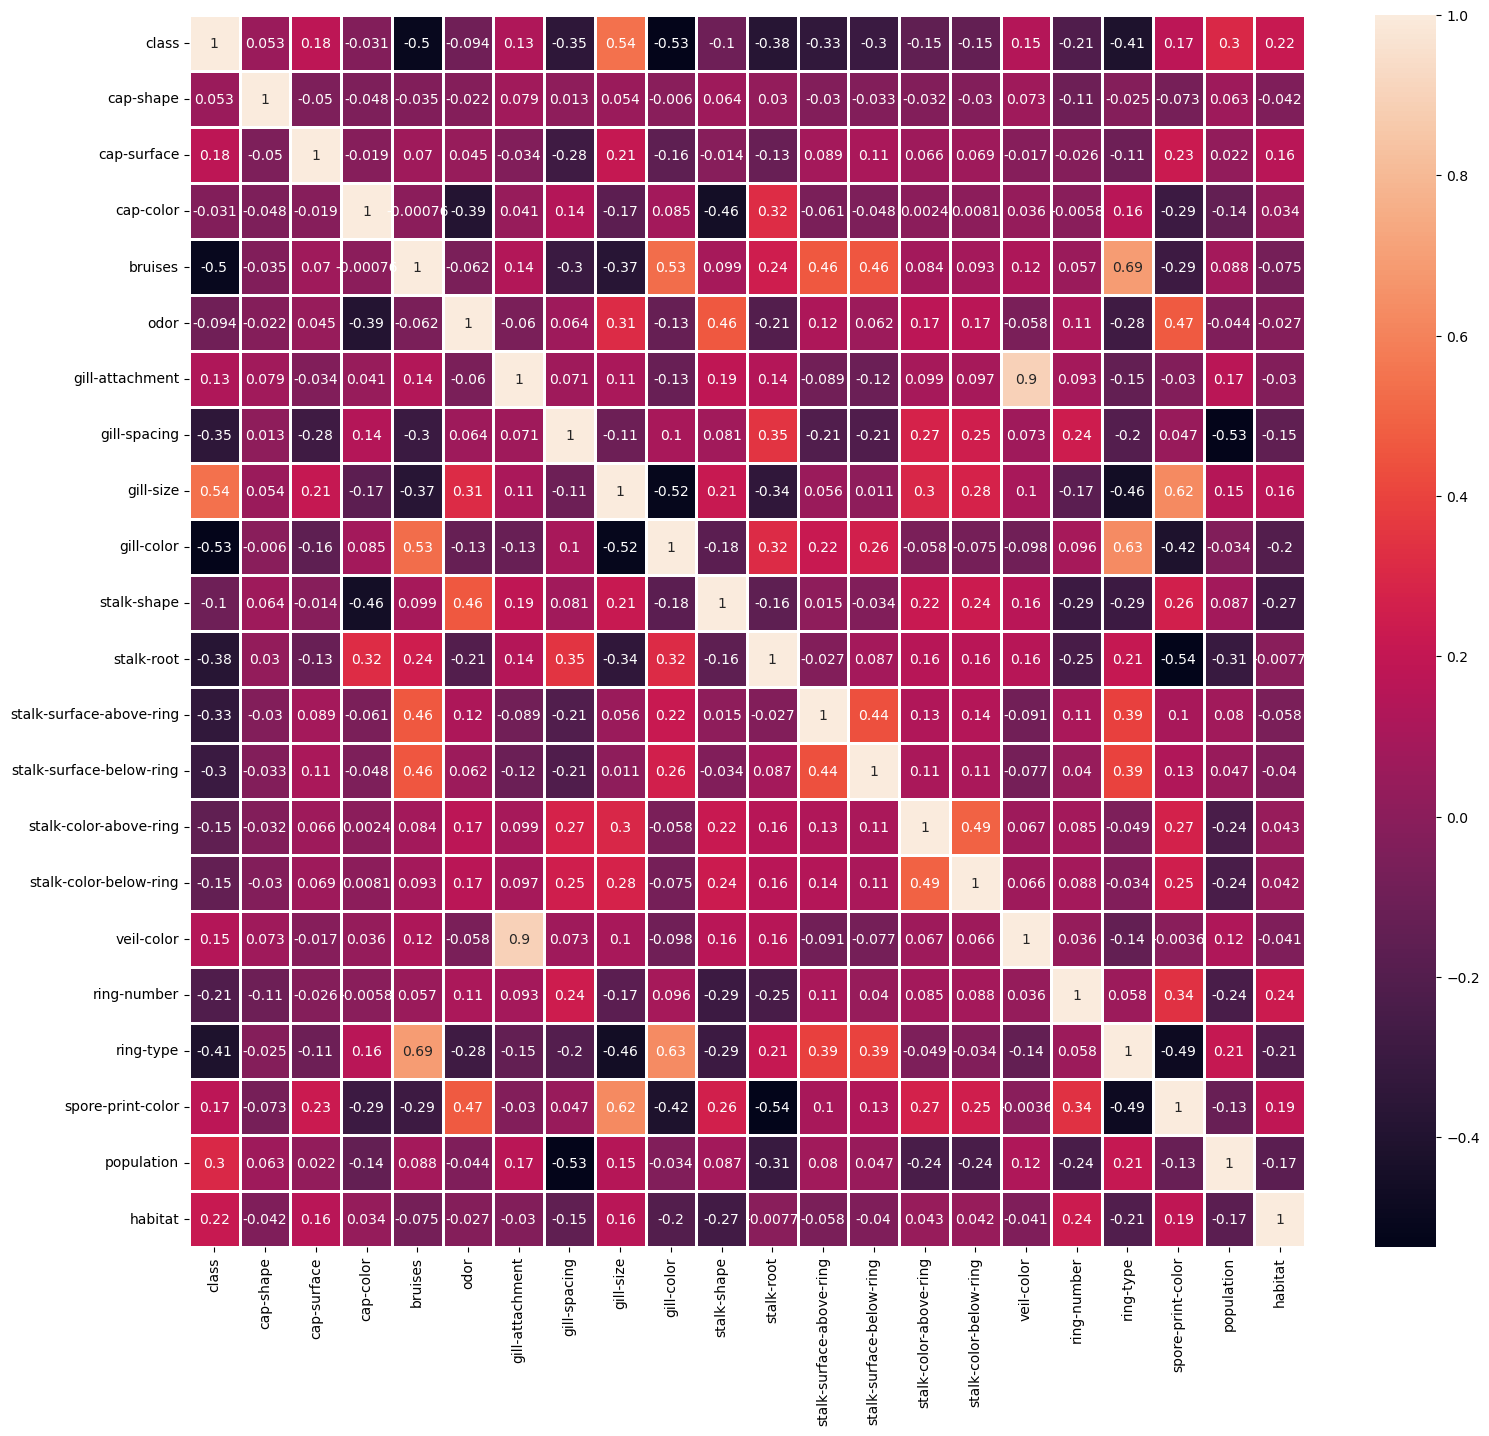

In [19]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),linewidths=1,annot=True)

<Axes: >

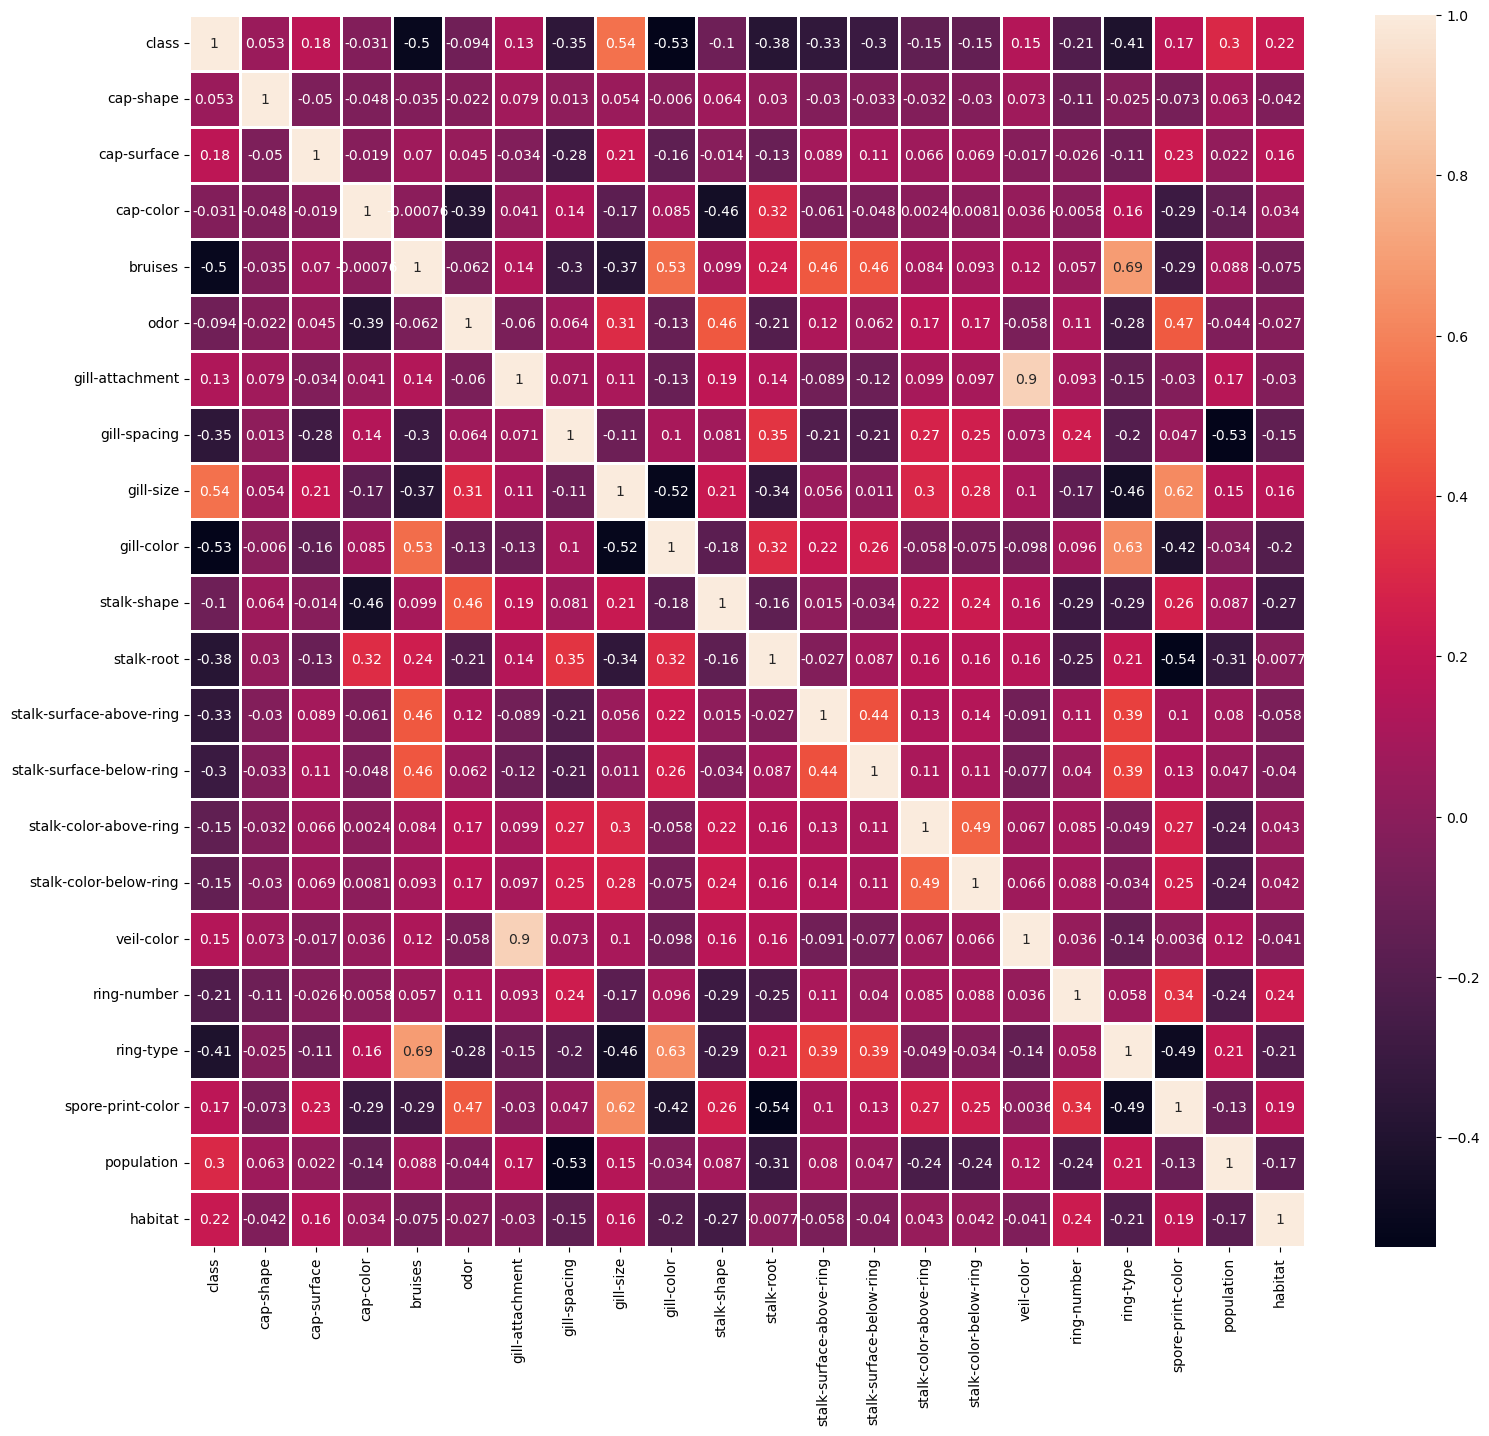

In [24]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),linewidths=1,annot=True)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
X = df.drop(columns=['class'])
y = df['class']

In [27]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,vif,features
0,5.463186,cap-shape
1,3.904712,cap-surface
2,5.950600,cap-color
3,7.984231,bruises
4,8.918271,odor
5,256.122838,gill-attachment
6,4.534113,gill-spacing
7,5.758180,gill-size
8,6.284702,gill-color
9,9.243136,stalk-shape


In [28]:
df = df.drop(['ring-type','bruises','spore-print-color','ring-number','gill-attachment'],axis=1)

In [29]:
df = df.drop(['veil-color'],axis=1)

In [30]:
df.shape

(8124, 16)

In [31]:
X = df.drop(columns=['class'])
y = df['class']

<Axes: >

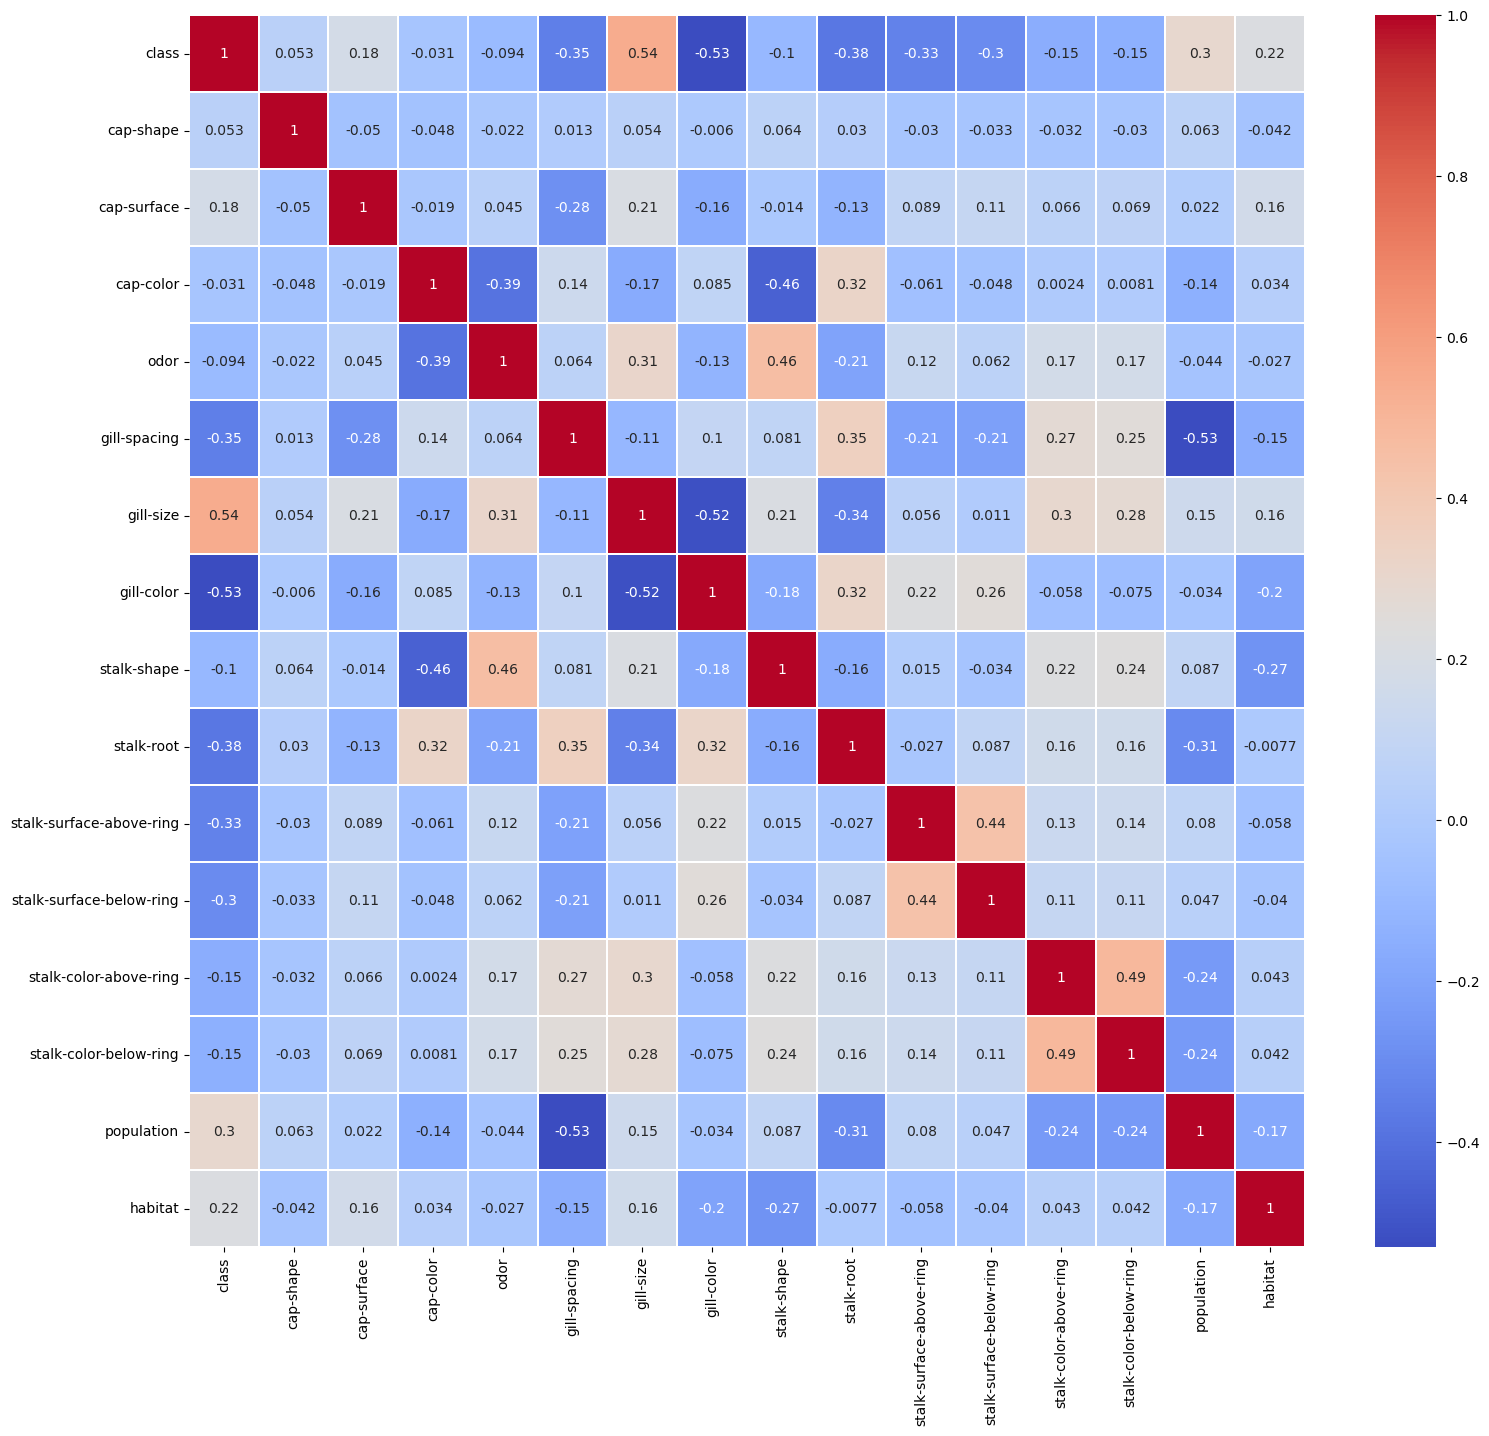

In [32]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),linewidths=.1,cmap='coolwarm',annot=True)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [34]:
X = df.drop(columns=['class'])
y = df['class']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.33)
print("training feature matrix size:",X_train.shape)
print("training target vector size:",y_train.shape)
print("training feature matrix size:",X_test.shape)
print("training target vector size:",y_test.shape)

training feature matrix size: (5443, 15)
training target vector size: (5443,)
training feature matrix size: (2681, 15)
training target vector size: (2681,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu = 0
maxRS = 0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=i,test_size=0.33)
    log_reg = LogisticRegression()
    log_reg.fit(X_train,y_train)
    y_pred = log_reg.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is",maxAccu,'on_random_state',maxRS)
    

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

best accuracy is 0.9511376352107422 on_random_state 233


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=233,test_size=0.33)
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+' Accuracy score Logistics Regression'+'\033[0m',accuracy_score(y_test,y_pred))
print('\n')
print('\033[1m'+'confusion matrix ofLogistics Regression'+'\033[0m',confusion_matrix(y_test,y_pred))
print('\n')
print('\033[1m'+'classification report of Logistics Regression'+'\033[0m',classification_report(y_test,y_pred))

Logistics Regression Evaluation


 Accuracy score Logistics Regression 0.9511376352107422


confusion matrix ofLogistics Regression [[1351   49]
 [  82 1199]]


classification report of Logistics Regression               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1400
           1       0.96      0.94      0.95      1281

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
parameter =  {'max-depth':range(2,20,3),
             'criterion':['gini','entropy'],
             'splitter':['best','random']}

In [40]:
GCV =GridSearchCV(DecisionTreeClassifier(),parameter,cv=6)

In [41]:
final_mod = DecisionTreeClassifier(criterion='gini',max_depth=14,splitter='best')
final_mod.fit(X_train,y_train)
y_pred = final_mod.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0
